In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [2]:
ra = 'glos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://seagull-erddap.glos.org/erddap


Pull in the processed inventory

In [3]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2022/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,45013,obs_2,45013,"Station 45013 - Atwater Park, WI",Milwaukee Buoy ATW20 (45013),43.1,-87.85,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN
1,45014,obs_43,45014,"Station 45014 - GB17 - South Green Bay, WI",Green Bay Buoy GB17 (45014),44.8,-87.76,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN
2,45022,obs_61,45022,"Station 45022 - Little Traverse Bay, MI",Little Traverse Bay Buoy U-GLOS 004 (45022),45.403,-85.088,moored_buoy,2009-07-29 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",Replace sea_surface_wind_wave_period with sea_...
3,45023,obs_44,45023,"Station 45023 - North Entry Buoy, North Keween...",North Entry MTU Buoy (45023),47.27,-88.607,moored_buoy,2010-07-08 00:00:00,Y,Yf,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_o...",Not yet deployed in 2022.
4,45024,obs_62,45024,"Station 45024 - Ludington Buoy, MI",Ludington Buoy (45024),43.977,-86.559,moored_buoy,2009-08-04 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...","This station also collects relative humidity, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN
123,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN
124,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",GLERLWE13 was moved to WLE-ESP in 2021 to be c...
125,WSLM4,obs_10,WSLM4,"Station WSLM4 - White Shoal Light, MI",Lake Michigan Evaporation and Meteorological D...,45.842,-85.135,tower,2016-02-22 00:00:00,Y,Yp,Great Lakes Environmental Research Lab,gov_federal,"wind_from_direction, wind_speed, air_pressure_...",NaN


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [5]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [6]:
not_found = []
found = dict()

exclude = ' -gliders'

search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station ID" = "45013"
Found "45013": ['obs_2']


searching "Station ID" = "45014"
Found "45014": ['obs_43']


searching "Station ID" = "45022"
Found "45022": ['obs_61']


searching "Station ID" = "45023"
Found "45023": ['obs_44']


searching "Station ID" = "45024"
Found "45024": ['obs_62']


searching "Station ID" = "45025"
Found "45025": ['obs_46']


searching "Station ID" = "45026"
Found "45026": ['obs_33']


searching "Station ID" = "45027"
Found "45027": ['obs_42']


searching "Station ID" = "45028"
Found "45028": ['obs_45']


searching "Station ID" = "45029"
Found "45029": ['obs_3']


searching "Station ID" = "45161"
Found "45161": ['glisa_general_monthly_erie', 'glisa_general_monthly_ontario', 'obs_49']


searching "Station ID" = "45162"
Found "45162": ['obs_67']


searching "Station ID" = "45163"
Found "45163": ['obs_68']


searching "Station ID" = "45164"
Found "45164": ['obs_70']


searching "Station ID" = "45165"
Found "45165": ['obs_71']


searching "Station ID" =

punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "LEORGN"
no dataset matching "LEORGN"
searching "Station Long Name" = "City of Oregon OH Pump Station (leorgn)"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Station ID" = "MBB"
Found "MBB": ['obs_195']


searching "Station ID" = "NCWB"
Found "NCWB": ['obs_229']


searching "Station ID" = "NEENAH"
Found "NEENAH": ['obs_205']


searching "Station ID" = "NICOLET"
Found "NICOLET": ['obs_145']


searching "Station ID" = "OKSI2"
Found "OKSI2": ['obs_114']


searching "Station ID" = "OMOECP_E1 "
no dataset matching "OMOECP_E1 "
searching "Station Long Name" = "Lake Erie - Central Basin 1 - OMECP Environmental Sensors"
Found "Lake Erie - Central Basin 1 - OMECP Environmental Sensors": ['obs_93']


searching "Station ID" = "OMOECP_O1"
no dataset matching "OMOECP_O1"
searching "Station Long Name" = "Lake Erie - Central Basin 1 - OMOECP Environmental Sensors"
punting with "WMO ID or NWS/CMAN ID" = nan

searching "Stati

Print the stations that we couldn't find.

In [7]:
len(not_found)

33

In [8]:
len(found)

94

Show me the record that has NaN for the first search element.

In [9]:
df.loc[df[search_order[0]].isna()]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes


Now show me the stations, with identifiers, that we couldn't find.

In [10]:
df[df[search_order[0]].isin(not_found)]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
22,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",Long-time station that has recently been conne...
35,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",Sending data to NDBC. GLOS will be ingesting ...
37,BEACH2,NaN,NaN,Beach2 Buoy,NaN,42.126653,-80.14903,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN
38,BEACH2_T,obs_4,NaN,Beach2 Meteorological Tower,NaN,42.126286,-80.147505,tower,2018,Y,N,Regional Science Consortium,nonprofit,"surface_downwelling_shortwave_flux_in_air, win...",NaN
39,BEACH6,NaN,NaN,Beach6 Buoy,NaN,42.144335,-80.139368,moored_buoy,2018,Y,N,Regional Science Consortium,nonprofit,"sea_water_temperature (1m), sea_water_specific...",NaN
40,BGUSD2,obs_79,NaN,Sandusky Bay buoy (bgsusd2),Sandusky Bay buoy (bgsusd2),41.496,-82.75,moored_buoy,2017-06-27 00:00:00,Y,N,Bowling Green State University,academic,"wind_from_direction, wind_speed, air_temperatu...",NaN
45,DEFWTP,NaN,NaN,DefianceWTP,NaN,41.27916666666667,-84.385,fixed,2022-03-01 00:00:00,Y,YfN,City of Defiance,gov_municipal,"phosphate, nitrate, ammonia, sea_water_specif...",This platform was funded by GLOS 2021 Minigran...
49,GBEL,NaN,NaN,Green Bay Entrance Light Continuous Monitoring...,NaN,44.65389,-87.929722,fixed,>5 year,Y,YpN,NEW Water,gov_municipal,"depth (1m, 7.2m), sea_water_temperature (1m, 7...",Long-term station that has recently been conne...
50,GBW-000,NaN,NaN,GBW000 at Mahon Creek,NaN,44.52615,-87.9429,fixed,2022-07-01 00:00:00,Y,Yf,University of Wisconsin-Green Bay,academic,"sea_water_temperature (1m), battery_voltage, l...",NaN
57,HTLPBLA,NaN,NaN,HTLP Blanchard Creek Monitoring Station,NaN,41.05583333333333,-83.68805555555556,fixed,>5 year,Y,YfN,Heidelberg University,academic,"mass_concentration_of_oxygen_in_sea_water, fra...",This platform has been operated by Heidelberg ...


Print out all the dataset IDs for the datasets that matched our criteria.

In [11]:
found

{'45013': {'Dataset ID': ['obs_2']},
 '45014': {'Dataset ID': ['obs_43']},
 '45022': {'Dataset ID': ['obs_61']},
 '45023': {'Dataset ID': ['obs_44']},
 '45024': {'Dataset ID': ['obs_62']},
 '45025': {'Dataset ID': ['obs_46']},
 '45026': {'Dataset ID': ['obs_33']},
 '45027': {'Dataset ID': ['obs_42']},
 '45028': {'Dataset ID': ['obs_45']},
 '45029': {'Dataset ID': ['obs_3']},
 '45161': {'Dataset ID': ['glisa_general_monthly_erie',
   'glisa_general_monthly_ontario',
   'obs_49']},
 '45162': {'Dataset ID': ['obs_67']},
 '45163': {'Dataset ID': ['obs_68']},
 '45164': {'Dataset ID': ['obs_70']},
 '45165': {'Dataset ID': ['obs_71']},
 '45167': {'Dataset ID': ['obs_99']},
 '45168': {'Dataset ID': ['obs_37']},
 '45169': {'Dataset ID': ['obs_216']},
 '45170': {'Dataset ID': ['obs_47']},
 '45174': {'Dataset ID': ['obs_57']},
 '45175': {'Dataset ID': ['obs_38']},
 '45176': {'Dataset ID': ['obs_72']},
 '45183': {'Dataset ID': ['obs_58']},
 '45184': {'Dataset ID': ['obs_60']},
 '45185': {'Dataset 

Check if each found dataset has coverage for specified CY

In [12]:
valid_datasets = []

cy = '2022'

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2022:
{'WIM_349', 'HTLPWES', 'FOXR', 'GB000', 'OMOECP_E1 ', 'HTLPHON', 'WIM_351', 'HTLPSAN', 'WIM_356', 'HTLPSTU', 'LELORAIN', '45198', 'UWRAEON4', 'JAKI2', 'LEBIWW', 'BSC1', 'HTLPPOR', 'OKSI2', '45185', 'NEENAH', 'UWRAEON1-22', 'HTLPWOL', '45197', '45175', 'DCW', 'STURGEON', 'WALNUT', 'GLERLWE2', 'UMBIO', 'USRAEON7', 'WIM_832', 'WIM_968', '45196', 'SBIPIB', 'MBB', 'HTLPROC', 'GRIM4', 'GLRCMET', 'LCDUe', 'WIM_352', 'DGOWAK', 'GLERLWE8', 'WIM_357', 'RDC_NSF', 'HTLPTIF', 'PSP', '45184', 'TREC_T', 'UWRAEON5', 'WIM_831', '45169', 'SBEDISON', 'NCWB', '45199', 'WIM_358', 'WIM_359', 'RBS-TOL', 'WIM_350', 'BLISS', 'GLERLWE4', 'GVSU1', 'WIM_355', 'BWB', 'ALGOMA', 'PA-DEP-1538', 'NICOLET', 'HTLPUTL'}


Show me the inventory metadata about the invalid stations:

In [13]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_not_avail
17,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",Sending data to NDBC. GLOS will be ingesting ...,True
20,45175,obs_38,45175,"Station 45175 - Mackinac Straits West, Mackina...",Mackinac Straits Buoy (45175),45.825,-84.772,moored_buoy,2015-08-28 00:00:00,Y,Yp,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_of...",Temperature string removed at the end of 2020 ...,True
22,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",Long-time station that has recently been conne...,True
24,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,True
25,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,WIM_831,NaN,NaN,HW_Marine_City,NaN,42.71670151,-82.49079895,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,True
122,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,True
123,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN,True
124,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",GLERLWE13 was moved to WLE-ESP in 2021 to be c...,True


Invert the `erddap_not_avail` column and drop it.

In [14]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_avail
0,45013,obs_2,45013,"Station 45013 - Atwater Park, WI",Milwaukee Buoy ATW20 (45013),43.1,-87.85,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_o...",NaN,True
1,45014,obs_43,45014,"Station 45014 - GB17 - South Green Bay, WI",Green Bay Buoy GB17 (45014),44.8,-87.76,moored_buoy,2011-08-12 00:00:00,Y,Yf,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, wind_speed_of...",NaN,True
2,45022,obs_61,45022,"Station 45022 - Little Traverse Bay, MI",Little Traverse Bay Buoy U-GLOS 004 (45022),45.403,-85.088,moored_buoy,2009-07-29 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...",Replace sea_surface_wind_wave_period with sea_...,True
3,45023,obs_44,45023,"Station 45023 - North Entry Buoy, North Keween...",North Entry MTU Buoy (45023),47.27,-88.607,moored_buoy,2010-07-08 00:00:00,Y,Yf,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_o...",Not yet deployed in 2022.,True
4,45024,obs_62,45024,"Station 45024 - Ludington Buoy, MI",Ludington Buoy (45024),43.977,-86.559,moored_buoy,2009-08-04 00:00:00,Y,Yf,University of Michigan CIGLR,academic,"wind_from_direction, wind_speed, wind_speed_of...","This station also collects relative humidity, ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,False
123,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN,False
124,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",GLERLWE13 was moved to WLE-ESP in 2021 to be c...,False
125,WSLM4,obs_10,WSLM4,"Station WSLM4 - White Shoal Light, MI",Lake Michigan Evaporation and Meteorological D...,45.842,-85.135,tower,2016-02-22 00:00:00,Y,Yp,Great Lakes Environmental Research Lab,gov_federal,"wind_from_direction, wind_speed, air_pressure_...",NaN,False


Make a plot of all points and color based on ERDDAP available or not.

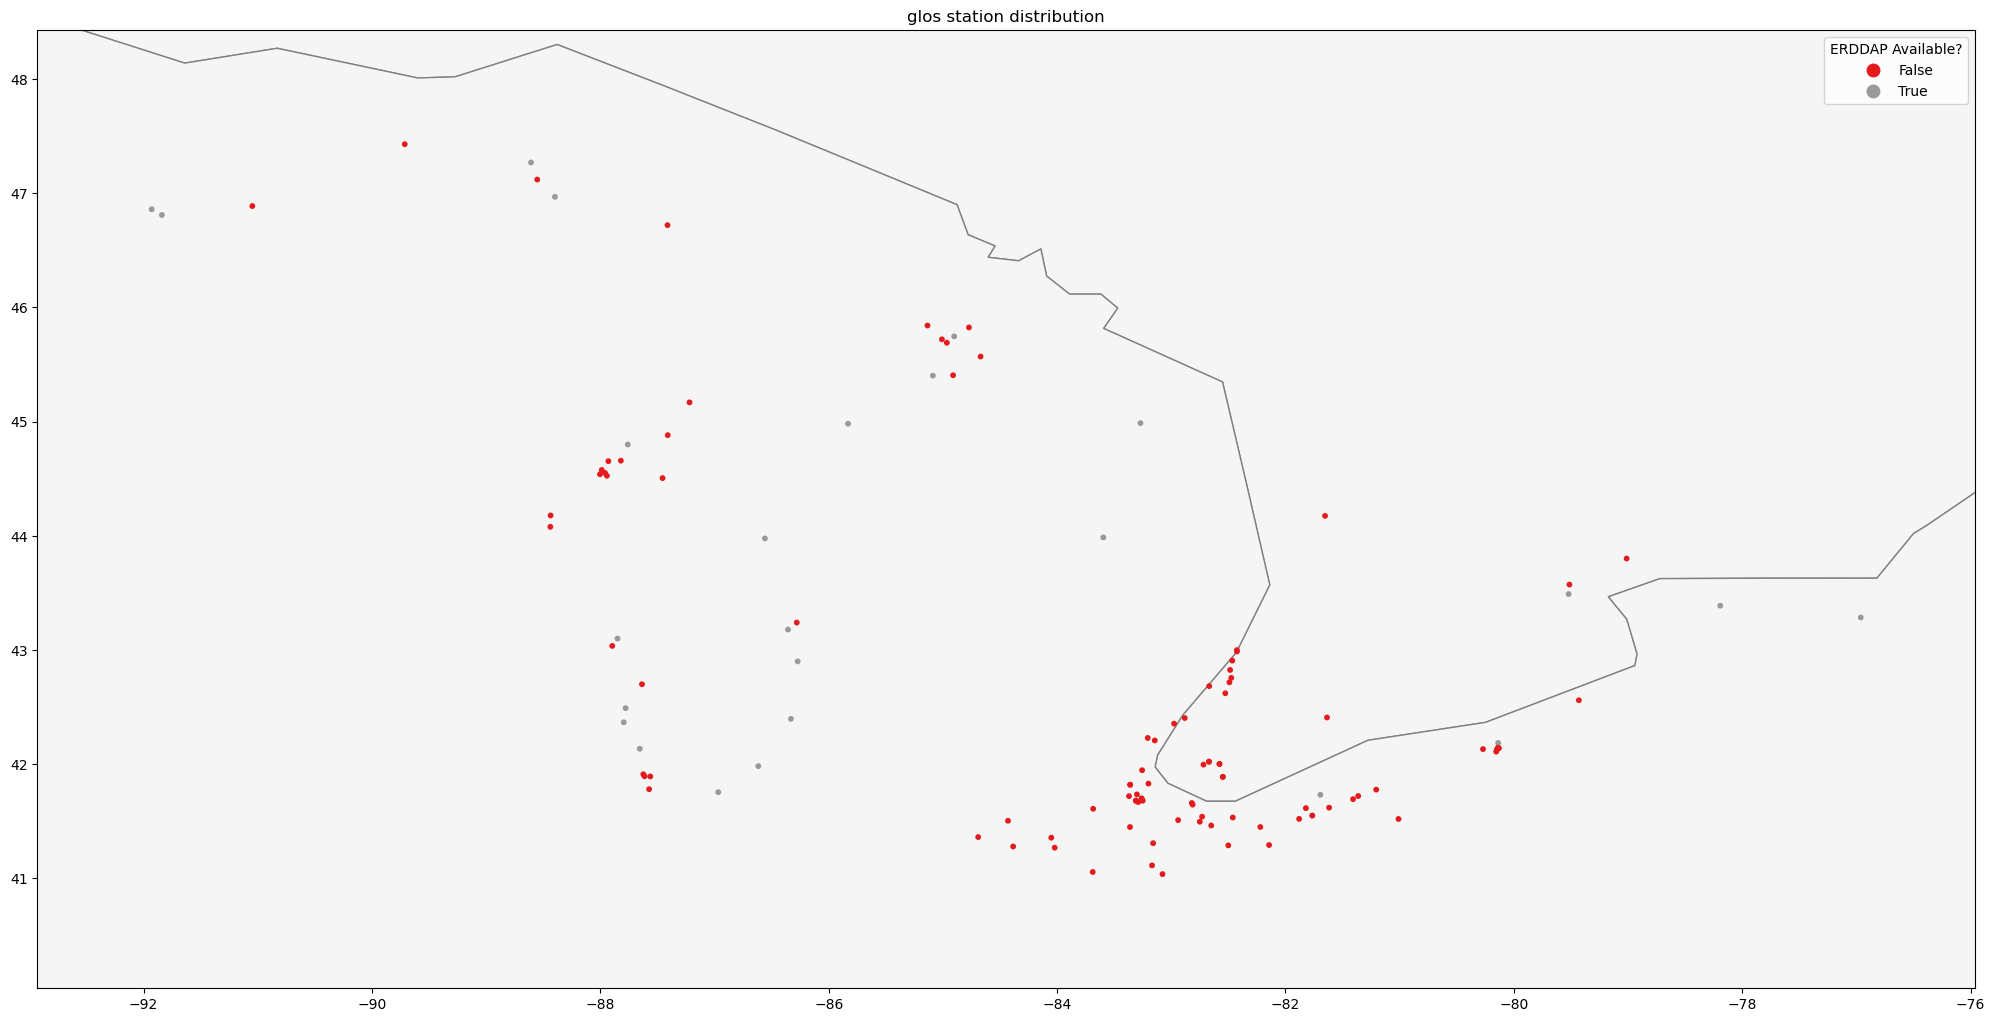

In [15]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [22]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1')


## Show me some bad coordinates

_if there are any_

In [17]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry
101,USRAEON7,NaN,NaN,UWindsor RAEON 7 Buoy,NaN,NaN,NaN,moored_buoy,2022-07-05 00:00:00,Y,N,University of Windsor,academic,NaN,Central buoy that receives and transmits data ...,False,POINT EMPTY


In [18]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [19]:
gdf_final.loc[~gdf_final['erddap_avail']]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry
17,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",Sending data to NDBC. GLOS will be ingesting ...,False,POINT (-81.82100 41.61500)
20,45175,obs_38,45175,"Station 45175 - Mackinac Straits West, Mackina...",Mackinac Straits Buoy (45175),45.825,-84.772,moored_buoy,2015-08-28 00:00:00,Y,Yp,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_of...",Temperature string removed at the end of 2020 ...,False,POINT (-84.77200 45.82500)
22,45177,NaN,45177,Ohio St. Beach Buoy,NaN,41.894,-87.613,moored_buoy,>5 year,Y,N,Chicago Parks District,gov_municipal,"sea_water_turbidity, sea_surface_temperature, ...",Long-time station that has recently been conne...,False,POINT (-87.61300 41.89400)
24,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,False,POINT (-87.95888 44.55028)
25,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,False,POINT (-87.98761 44.57673)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,WIM_831,NaN,NaN,HW_Marine_City,NaN,42.71670151,-82.49079895,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,False,POINT (-82.49080 42.71670)
122,WIM_832,NaN,NaN,HW_Algonac,NaN,42.6211,-82.5267,fixed,2007,Y,N,Wayne State University,academic,mass_concentration_of_chlorophyll_in_sea_water...,NaN,False,POINT (-82.52670 42.62110)
123,WIM_968,NaN,NaN,HW_Monroe,NaN,41.947181,-83.255645,fixed,2007,Y,N,Wayne State University,academic,"phycocyanin_concentration, phycocyanin_fluore...",NaN,False,POINT (-83.25565 41.94718)
124,WLE-ESP,obs_89,NaN,WLE-ESP,Nutrient buoy in Western Lake Erie deployed ne...,41.7351,-83.3007,moored_buoy,2021-05-08 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",GLERLWE13 was moved to WLE-ESP in 2021 to be c...,False,POINT (-83.30070 41.73510)


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [34]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]

gdf_ckan['RA'] = 'GLOS'

for station in gdf_ckan['Station ID'].dropna():
    
    ra = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('RA "{}" + Station "{}"'.format(ra,station))

    fq = '+{}+{}'.format(station,ra)

    datasets = ioos_catalog.action.package_search(fq=fq)

    print('found {} dataset(s)'.format(datasets['count']))

    if datasets['count'] > 0:
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('{} is valid.'.format(station))
                else:
                    print('{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                problem_datasets.append(station)

C:\Users\Mathew.Biddle\programs\Miniforge\envs\ioos-asset-inventory\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


RA "GLOS" + Station "45169"
found 1 dataset(s)
	 45169
RA "GLOS" + Station "45175"
found 1 dataset(s)
	 45175
RA "GLOS" + Station "45177"
found 0 dataset(s)
RA "GLOS" + Station "45184"
found 1 dataset(s)
	 45184
RA "GLOS" + Station "45185"
found 1 dataset(s)
	 45185
RA "GLOS" + Station "45196"
found 0 dataset(s)
RA "GLOS" + Station "45197"
found 0 dataset(s)
RA "GLOS" + Station "45198"
found 0 dataset(s)
RA "GLOS" + Station "45199"
found 0 dataset(s)
RA "GLOS" + Station "45176b"
found 2 dataset(s)
	 45176
	 45176b
RA "GLOS" + Station "ALGOMA"
found 0 dataset(s)
RA "GLOS" + Station "BEACH2"
found 0 dataset(s)
RA "GLOS" + Station "BEACH2_T"
found 0 dataset(s)
RA "GLOS" + Station "BEACH6"
found 0 dataset(s)
RA "GLOS" + Station "BGUSD2"
found 0 dataset(s)
RA "GLOS" + Station "BLISS"
found 0 dataset(s)
RA "GLOS" + Station "BSC1"
found 0 dataset(s)
RA "GLOS" + Station "BWB"
found 0 dataset(s)
RA "GLOS" + Station "DCW"
found 0 dataset(s)
RA "GLOS" + Station "DEFWTP"
found 0 dataset(s)
RA "GLO

Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [35]:
gdf_ckan.loc[gdf_ckan['Station ID'].isin(problem_datasets)]

,Station ID,Dataset (ERDDAP) ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)","RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Variable Names,Additional notes,erddap_avail,geometry,RA
17,45169,NaN,45169,"Station 45169 - Lakewood Buoy, OH",Cleveland Wind Buoy (45169),41.615,-81.821,moored_buoy,2015-06-27 00:00:00,Y,N,LimnoTech,industry,"wind_from_direction, wind_speed, wind_speed_of...",Sending data to NDBC. GLOS will be ingesting ...,False,POINT (-81.82100 41.61500),GLOS
20,45175,obs_38,45175,"Station 45175 - Mackinac Straits West, Mackina...",Mackinac Straits Buoy (45175),45.825,-84.772,moored_buoy,2015-08-28 00:00:00,Y,Yp,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_of...",Temperature string removed at the end of 2020 ...,False,POINT (-84.77200 45.82500),GLOS
24,45184,obs_60,45184,Green Bay East,Green Bay East (45184),44.55028,-87.95888,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,False,POINT (-87.95888 44.55028),GLOS
25,45185,obs_59,45185,Green Bay West,Green Bay West (45185),44.57673,-87.98761,moored_buoy,2018-07-01 00:00:00,Y,N,University of Wisconsin-Milwaukee,academic,"wind_from_direction, wind_speed, sea_water_tem...",Not yet deployed in 2022.,False,POINT (-87.98761 44.57673),GLOS
35,45176b,NaN,NaN,Cleveland Crib Bottom Sonde (45176b),Cleveland Crib Bottom Sonde (45176b),41.55,-81.765,fixed,2016-06-07 00:00:00,Y,N,LimnoTech,industry,"sea_water_electrical_conductivity, sea_water_p...",Sending data to NDBC. GLOS will be ingesting ...,False,POINT (-81.76500 41.55000),GLOS
51,GLERLWE2,obs_80,NaN,NOAA GLERL WE2 (glerlwe2),NOAA GLERL WE2 (glerlwe2),41.82,-83.36,moored_buoy,2015-05-01 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",NaN,False,POINT (-83.36000 41.82000),GLOS
52,GLERLWE4,obs_81,NaN,NOAA GLERL WE4 (glerlwe4),NOAA GLERL WE4 (glerlwe4),41.83,-83.2,moored_buoy,2015-05-01 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",NaN,False,POINT (-83.20000 41.83000),GLOS
53,GLERLWE8,obs_82,NaN,NOAA GLERL WE8 (glerlwe8),NOAA GLERL WE8 (glerlwe8),41.82,-83.36,moored_buoy,2015-05-01 00:00:00,Y,Yp,Great Lakes Environmental Research Laboratory,gov_federal,"wind_from_direction,wind_speed,wind_speed_of_g...",NaN,False,POINT (-83.36000 41.82000),GLOS
54,GLRCMET,obs_29,NaN,GLRC Waterfront Meteorological Station,NaN,47.12014,-88.55287,tower,2017-11-01 00:00:00,Y,N,Michigan Tech University,academic,"wind_from_direction, wind_speed, wind_speed_gu...",NaN,False,POINT (-88.55287 47.12014),GLOS
55,GRIM4,NaN,GRIM4,"Station GRIM4 - Granite Island, MI",Lake Superior Evaporation and Meteorological D...,46.721,-87.412,tower,2010-10-06 00:00:00,Y,N,"Environment Canada, University of Colorado, Li...","gov_federal, nonprofit, industry","wind_from_direction, wind_speed, wind_speed_o...",NaN,False,POINT (-87.41200 46.72100),GLOS


Print out the available metadata from the IOOS Catalog for the last dataset.

In [36]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': 'bb55ba1f-9c92-4539-a676-e1fea85df891',
 'id': 'eba2db0d-524d-44d6-8234-891a917e4947',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2023-01-18T02:05:32.787446',
 'metadata_modified': '2023-01-18T02:05:32.787461',
 'name': 'wslm4',
 'notes': '',
 'num_resources': 0,
 'num_tags': 11,
 'organization': {'id': '9f14cfa2-a1be-4c1e-843d-a4585ca96b62',
  'name': 'glos',
  'title': 'GLOS',
  'type': 'organization',
  'description': 'GLOS is one of 11 Regional Associations of the Integrated Ocean Observing System (IOOS), working to enhance the ability to collect, deliver, and use ocean and Great Lakes information. IOOS is a partnership among federal, regional, academic and private sector parties that works to provide new tools and forecasts to improve safety, enhance the economy, and protect our environment.',
  'image_url': 'https://s3.amazonaws.com